In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
code = "BID"
url = f"https://vinacorp.vn/trade-history/{code}"
response = requests.get(url)

In [4]:
response.content

b'<!DOCTYPE html>\r\n<html xmlns="http://www.w3.org/1999/xhtml" dir="ltr" lang="en" xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">\r\n<head>\r\n    <meta charset="UTF-8">\r\n    <meta name="description" content="th\xe1\xbb\x8b tr\xc6\xb0\xe1\xbb\x9dng ch\xe1\xbb\xa9ng kho\xc3\xa1n, tin doanh nghi\xe1\xbb\x87p, t\xc3\xa0i ch\xc3\xadnh, ng\xc3\xa2n h\xc3\xa0ng, kinh t\xe1\xba\xbf \xc4\x91\xe1\xba\xa7u t\xc6\xb0, b\xe1\xba\xa5t \xc4\x91\xe1\xbb\x99ng s\xe1\xba\xa3n, nh\xe1\xba\xadn \xc4\x91\xe1\xbb\x8bnh chuy\xc3\xaan gia, thong tin chung khoan, tin tuc chung khoan, co phieu"/>\r\n    <meta name="keywords" content="c\xe1\xbb\x95ng th\xc3\xb4ng tin doanh nghi\xe1\xbb\x87p, th\xe1\xbb\x8b tr\xc6\xb0\xe1\xbb\x9dng t\xc3\xa0i ch\xc3\xadnh, ch\xe1\xbb\xa9ng kho\xc3\xa1n vi\xe1\xbb\x87t nam v\xc3\xa0 qu\xe1\xbb\x91c t\xe1\xba\xbf"/>\r\n    <title>L\xe1\xbb\x8bch s\xe1\xbb\xad giao d\xe1\xbb\x8bch BID  - Vinacorp - C\xe1\xbb\x95ng th\xc3\xb4ng tin Doanh nghi\xe1\xbb\x

In [5]:
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
table = soup.find('table', id ='myTable2')
# extract the rows of the tables
rows = table.find_all('tr')

for row_id, row in enumerate(rows): 
    columns = row.find_all('td')
    # print(f"row={row_id}: {columns}")
    if columns:
        ngày = columns[0].text.strip()
        đóng_cửa = columns[1].text.strip()
        thay_đổi = columns[2].text.strip()
        phần_trăm = columns[3].text.strip()
        Mở_cửa = columns[4].text.strip()
        Cao_nhất = columns[5].text.strip()
        Thấp_nhất = columns[6].text.strip()
        Tổng_KLGD = columns[7].text.strip()
        Tổng_GTGD = columns[8].text.strip()

        print(f"ngày: {ngày}\
                \nđóng_cửa:{đóng_cửa}\
                \nthay_đổi: {thay_đổi}\
                \nphần_trăm: {phần_trăm}\
                \nMở_cửa: {Mở_cửa}\
                \nCao_nhất: {Cao_nhất}\
                \nThấp_nhất: {Thấp_nhất}\
                \nTổng_KLGD: {Tổng_KLGD}\
                \nTổng_GTGD: {Tổng_GTGD}\n\n")

ngày: 09/08/2024                
đóng_cửa:46,700                
thay_đổi: 0.70
▲                
phần_trăm: 1.50                
Mở_cửa: 46,000                
Cao_nhất: 47,000                
Thấp_nhất: 46,350                
Tổng_KLGD: 105,090                
Tổng_GTGD: 4,907,703,000


ngày: 08/08/2024                
đóng_cửa:46,000                
thay_đổi: -0.40
▼                
phần_trăm: -0.87                
Mở_cửa: 46,400                
Cao_nhất: 46,800                
Thấp_nhất: 45,700                
Tổng_KLGD: 142,400                
Tổng_GTGD: 6,550,400,000


ngày: 07/08/2024                
đóng_cửa:46,400                
thay_đổi: -0.35
▼                
phần_trăm: -0.75                
Mở_cửa: 46,750                
Cao_nhất: 47,400                
Thấp_nhất: 46,000                
Tổng_KLGD: 214,500                
Tổng_GTGD: 9,952,800,000


ngày: 06/08/2024                
đóng_cửa:46,750                
thay_đổi: 0.65
▲                
phần_trăm: 1.39             

In [7]:
from src.crawler import *
code = "BID"
df = get_stock_data(code)

## Clean

### Shape?

In [8]:
df.shape

(2722, 9)

### Cols ?

In [9]:
df.columns

Index(['ngày', 'đóng_cửa', 'thay_đổi', 'phần_trăm', 'Mở_cửa', 'Cao_nhất',
       'Thấp_nhất', 'Tổng_KLGD', 'Tổng_GTGD'],
      dtype='object')

In [10]:
df.tail

<bound method NDFrame.tail of             ngày đóng_cửa  thay_đổi phần_trăm  Mở_cửa Cao_nhất Thấp_nhất  \
0     09/08/2024   46,700   0.70\n▲      1.50  46,000   47,000    46,350   
1     08/08/2024   46,000  -0.40\n▼     -0.87  46,400   46,800    45,700   
2     07/08/2024   46,400  -0.35\n▼     -0.75  46,750   47,400    46,000   
3     06/08/2024   46,750   0.65\n▲      1.39  46,100   47,650    45,850   
4     05/08/2024   46,100  -1.65\n▼     -3.58  47,750   47,200    45,000   
...          ...      ...       ...       ...     ...      ...       ...   
2717  07/02/2014   16,600  -1.00\n▼     -5.68  17,400   17,500    16,500   
2718  06/02/2014   17,600  -0.80\n▼     -4.35  18,200   18,300    17,600   
2719  27/01/2014   18,400  -0.40\n▼     -2.13  18,700   18,800    18,100   
2720  24/01/2014   18,800  0.00\n■■      0.00  19,000   19,500    18,500   
2721  01/01/1970   46,000  0.00\n■■      0.00  46,000        0         0   

      Tổng_KLGD        Tổng_GTGD  
0       105,090    4,9

### Stats

In [11]:
df.describe()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
count,2722,2722,2722,2722,2722,2722,2722,2722,2722
unique,2722,616,126,806,600,639,626,2567,2582
top,09/08/2024,"16,600",0.00\n■■,0.00,"16,600","16,900","16,500","78,139","4,336,714,500"
freq,1,27,264,264,24,26,24,7,7


### dtypes ?

In [12]:
df.dtypes

ngày         object
đóng_cửa     object
thay_đổi     object
phần_trăm    object
Mở_cửa       object
Cao_nhất     object
Thấp_nhất    object
Tổng_KLGD    object
Tổng_GTGD    object
dtype: object

### 5 first rows ?

In [13]:
df.head()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,09/08/2024,"46,700",0.70\n▲,1.50,"46,000","47,000","46,350","105,090","4,907,703,000"
1,08/08/2024,"46,000",-0.40\n▼,-0.87,"46,400","46,800","45,700","142,400","6,550,400,000"
2,07/08/2024,"46,400",-0.35\n▼,-0.75,"46,750","47,400","46,000","214,500","9,952,800,000"
3,06/08/2024,"46,750",0.65\n▲,1.39,"46,100","47,650","45,850","180,610","8,443,517,500"
4,05/08/2024,"46,100",-1.65\n▼,-3.58,"47,750","47,200","45,000","272,310","12,553,491,000"


convert date dtype to datetime

In [14]:
import pandas as pd
df['ngày'] = pd.to_datetime(df['ngày'], dayfirst= True, errors = 'coerce')
# df['ngày'] = pd.to_datetime(df['ngày'], errors='coerce')

In [15]:

df.dtypes

ngày         datetime64[ns]
đóng_cửa             object
thay_đổi             object
phần_trăm            object
Mở_cửa               object
Cao_nhất             object
Thấp_nhất            object
Tổng_KLGD            object
Tổng_GTGD            object
dtype: object

fix string ở thay_đổi

In [16]:
temp = df["thay_đổi"]
temp.head()

0     0.70\n▲
1    -0.40\n▼
2    -0.35\n▼
3     0.65\n▲
4    -1.65\n▼
Name: thay_đổi, dtype: object

In [17]:
# thay_đổi = str(thay_đổi)
cleaned_str = df["thay_đổi"].str.replace("\n▲","").str.replace("\n■■","").str.replace("\n▼","")
# cleaned_str = thay_đổi.replace(',', '').replace('+', '').replace('■■', '').strip()
df['thay_đổi'] = pd.to_numeric(cleaned_str)


In [18]:
df.head()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,2024-08-09,"46,700",0.70,1.50,"46,000","47,000","46,350","105,090","4,907,703,000"
1,2024-08-08,"46,000",-0.40,-0.87,"46,400","46,800","45,700","142,400","6,550,400,000"
2,2024-08-07,"46,400",-0.35,-0.75,"46,750","47,400","46,000","214,500","9,952,800,000"
3,2024-08-06,"46,750",0.65,1.39,"46,100","47,650","45,850","180,610","8,443,517,500"
4,2024-08-05,"46,100",-1.65,-3.58,"47,750","47,200","45,000","272,310","12,553,491,000"


In [19]:
df.dtypes

ngày         datetime64[ns]
đóng_cửa             object
thay_đổi            float64
phần_trăm            object
Mở_cửa               object
Cao_nhất             object
Thấp_nhất            object
Tổng_KLGD            object
Tổng_GTGD            object
dtype: object

convert dtypes

In [20]:
df.head()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,2024-08-09,"46,700",0.70,1.50,"46,000","47,000","46,350","105,090","4,907,703,000"
1,2024-08-08,"46,000",-0.40,-0.87,"46,400","46,800","45,700","142,400","6,550,400,000"
2,2024-08-07,"46,400",-0.35,-0.75,"46,750","47,400","46,000","214,500","9,952,800,000"
3,2024-08-06,"46,750",0.65,1.39,"46,100","47,650","45,850","180,610","8,443,517,500"
4,2024-08-05,"46,100",-1.65,-3.58,"47,750","47,200","45,000","272,310","12,553,491,000"


In [21]:
# convert column from object to float

df["đóng_cửa"] = df["đóng_cửa"].str.replace(',', '').astype(float)
df["phần_trăm"] = df["phần_trăm"].str.replace(',', '').astype(float)
df["Mở_cửa"] = df["Mở_cửa"].str.replace(',', '').astype(float)
df["Cao_nhất"] = df["Cao_nhất"].str.replace(',', '').astype(float)
df["Thấp_nhất"] = df["Thấp_nhất"].str.replace(',', '').astype(float)
df["Tổng_KLGD"] = df["Tổng_KLGD"].str.replace(',', '').astype(float)
df["Tổng_GTGD"] = df["Tổng_GTGD"].str.replace(',', '').astype(float)




In [22]:
df.head()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,2024-08-09,46700.0,0.70,1.50,46000.0,47000.0,46350.0,105090.0,4.907703e+09
1,2024-08-08,46000.0,-0.40,-0.87,46400.0,46800.0,45700.0,142400.0,6.550400e+09
2,2024-08-07,46400.0,-0.35,-0.75,46750.0,47400.0,46000.0,214500.0,9.952800e+09
3,2024-08-06,46750.0,0.65,1.39,46100.0,47650.0,45850.0,180610.0,8.443518e+09
4,2024-08-05,46100.0,-1.65,-3.58,47750.0,47200.0,45000.0,272310.0,1.255349e+10


In [23]:
df.dtypes

ngày         datetime64[ns]
đóng_cửa            float64
thay_đổi            float64
phần_trăm           float64
Mở_cửa              float64
Cao_nhất            float64
Thấp_nhất           float64
Tổng_KLGD           float64
Tổng_GTGD           float64
dtype: object

In [24]:
df.head()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,2024-08-09,46700.0,0.70,1.50,46000.0,47000.0,46350.0,105090.0,4.907703e+09
1,2024-08-08,46000.0,-0.40,-0.87,46400.0,46800.0,45700.0,142400.0,6.550400e+09
2,2024-08-07,46400.0,-0.35,-0.75,46750.0,47400.0,46000.0,214500.0,9.952800e+09
3,2024-08-06,46750.0,0.65,1.39,46100.0,47650.0,45850.0,180610.0,8.443518e+09
4,2024-08-05,46100.0,-1.65,-3.58,47750.0,47200.0,45000.0,272310.0,1.255349e+10


In [25]:
df.describe()

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
count,2722,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2.722000e+03,2.722000e+03
mean,2019-05-10 03:50:07.494489600,32110.562087,0.045738,0.105525,32066.458486,32543.589273,31612.582660,1.128259e+06,2.913595e+10
min,1970-01-01 00:00:00,12600.000000,-3.700000,-9.730000,12600.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2016-10-21 18:00:00,19400.000000,-0.300000,-0.980000,19400.000000,19700.000000,19000.000000,1.335850e+05,4.780870e+09
50%,2019-05-28 12:00:00,34600.000000,0.000000,0.000000,34550.000000,35000.000000,33975.000000,2.949700e+05,1.025563e+10
75%,2021-12-06 18:00:00,42000.000000,0.400000,1.200000,41950.000000,42500.000000,41487.500000,1.623078e+06,3.409375e+10
max,2024-08-09 00:00:00,55500.000000,15.200000,33.370000,55500.000000,56700.000000,53800.000000,8.277000e+07,4.059868e+12
std,NaN,11730.594144,0.875763,2.444113,11707.461061,11954.289557,11617.881302,2.749764e+06,1.018977e+11


filter day 

In [26]:
from datetime import datetime 

end = datetime.now() 
start = datetime(end.year-5, end.month, end.day)

df = df[(
    (df["ngày"].dt.year >= start.year) & 
    (df["ngày"].dt.year <= end.year)&
    (df["ngày"].dt.month >= start.month)&
    (df["ngày"].dt.month <= end.month)
#     (df["ngày"].dt.day >= start.day)&
#     (df["ngày"].dt.day <= end.day)
    )] 

In [28]:
df

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,2024-08-09,46700.0,0.70,1.50,46000.0,47000.0,46350.0,105090.0,4.907703e+09
1,2024-08-08,46000.0,-0.40,-0.87,46400.0,46800.0,45700.0,142400.0,6.550400e+09
2,2024-08-07,46400.0,-0.35,-0.75,46750.0,47400.0,46000.0,214500.0,9.952800e+09
3,2024-08-06,46750.0,0.65,1.39,46100.0,47650.0,45850.0,180610.0,8.443518e+09
4,2024-08-05,46100.0,-1.65,-3.58,47750.0,47200.0,45000.0,272310.0,1.255349e+10
...,...,...,...,...,...,...,...,...,...
1308,2019-08-07,34700.0,-0.50,-1.44,35200.0,35500.0,34700.0,108138.0,3.752389e+09
1309,2019-08-06,35200.0,-0.60,-1.70,35800.0,35650.0,34500.0,122964.0,4.328333e+09
1310,2019-08-05,35800.0,0.00,0.00,35800.0,35800.0,35450.0,196900.0,7.049020e+09
1311,2019-08-02,35800.0,0.30,0.84,35450.0,36000.0,34900.0,182409.0,6.530242e+09


In [29]:
df

,ngày,đóng_cửa,thay_đổi,phần_trăm,Mở_cửa,Cao_nhất,Thấp_nhất,Tổng_KLGD,Tổng_GTGD
0,2024-08-09,46700.0,0.70,1.50,46000.0,47000.0,46350.0,105090.0,4.907703e+09
1,2024-08-08,46000.0,-0.40,-0.87,46400.0,46800.0,45700.0,142400.0,6.550400e+09
2,2024-08-07,46400.0,-0.35,-0.75,46750.0,47400.0,46000.0,214500.0,9.952800e+09
3,2024-08-06,46750.0,0.65,1.39,46100.0,47650.0,45850.0,180610.0,8.443518e+09
4,2024-08-05,46100.0,-1.65,-3.58,47750.0,47200.0,45000.0,272310.0,1.255349e+10
...,...,...,...,...,...,...,...,...,...
1308,2019-08-07,34700.0,-0.50,-1.44,35200.0,35500.0,34700.0,108138.0,3.752389e+09
1309,2019-08-06,35200.0,-0.60,-1.70,35800.0,35650.0,34500.0,122964.0,4.328333e+09
1310,2019-08-05,35800.0,0.00,0.00,35800.0,35800.0,35450.0,196900.0,7.049020e+09
1311,2019-08-02,35800.0,0.30,0.84,35450.0,36000.0,34900.0,182409.0,6.530242e+09


analyze

In [30]:
DC = df[['ngày', 'đóng_cửa']]

In [31]:
DC.head()

,ngày,đóng_cửa
0,2024-08-09,46700.0
1,2024-08-08,46000.0
2,2024-08-07,46400.0
3,2024-08-06,46750.0
4,2024-08-05,46100.0


In [32]:
df = df.set_index("ngày")

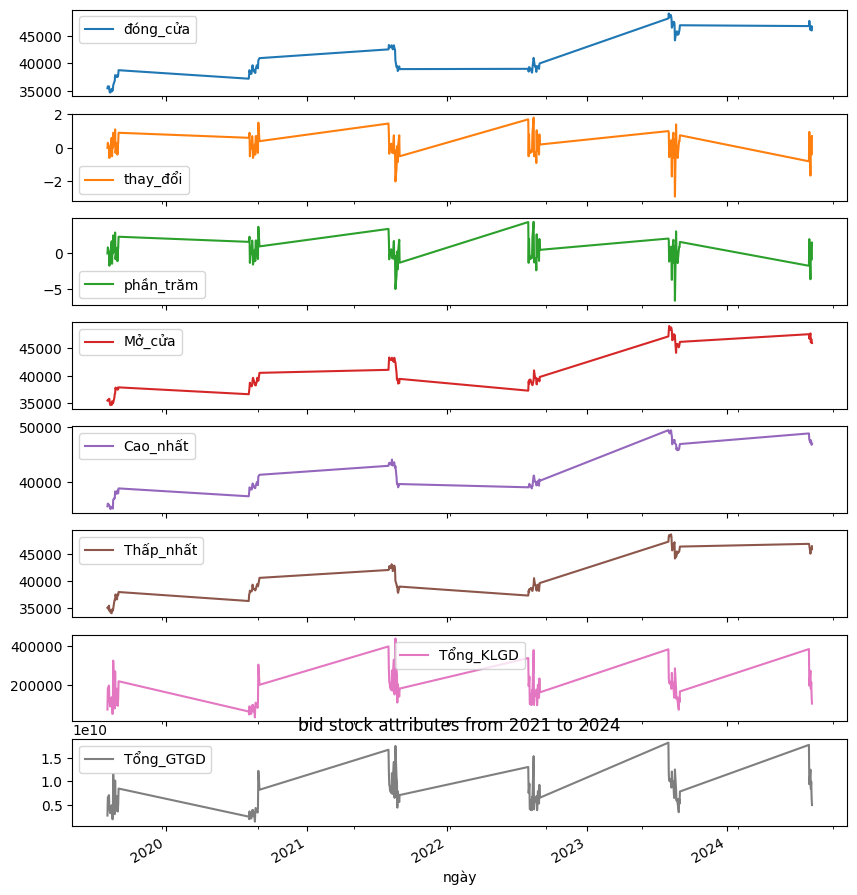

In [33]:
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(10,12))
plt.title('bid stock attributes from 2021 to 2024')
plt.savefig('stocks.png')
plt.show()

<Axes: xlabel='ngày'>

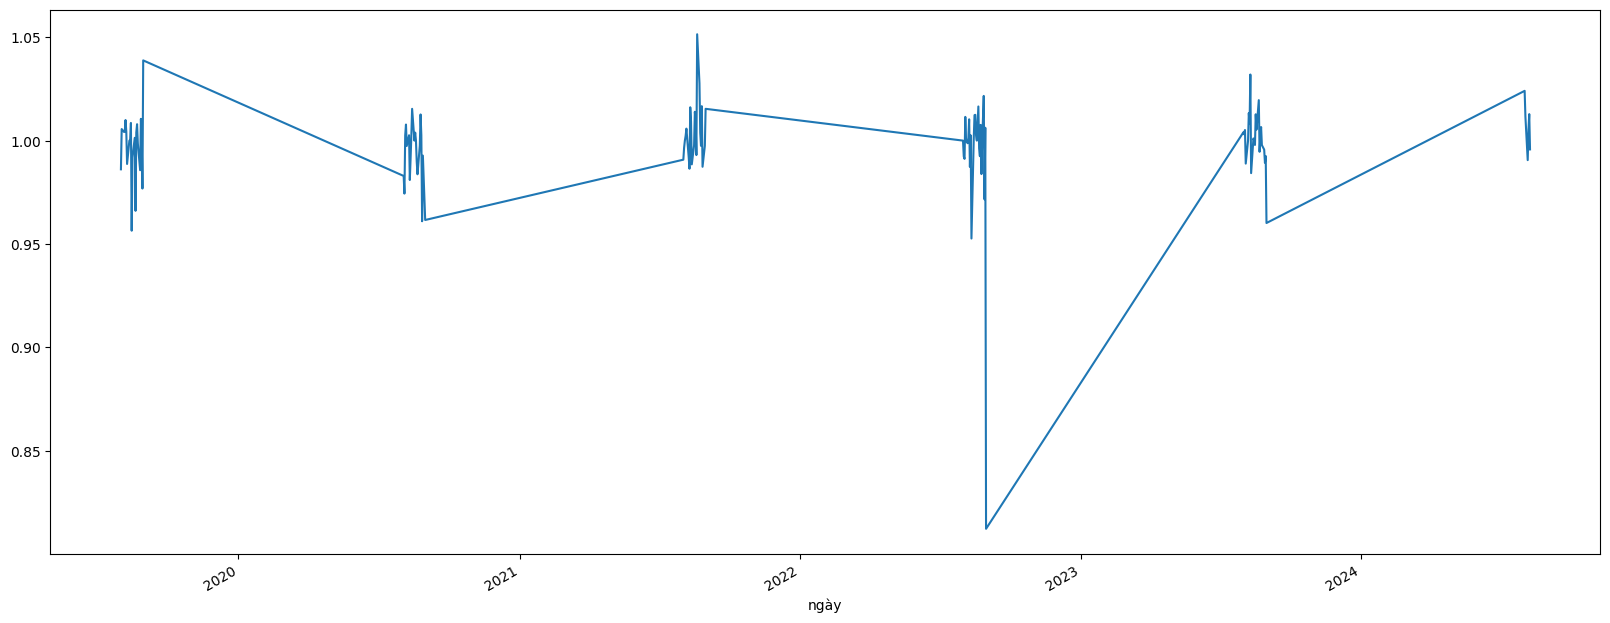

In [34]:
# percent change
df['thay_đổi'] = df.Cao_nhất.div(df.Cao_nhất.shift())
df['thay_đổi'].plot(figsize=(20,8))

<Axes: xlabel='ngày'>

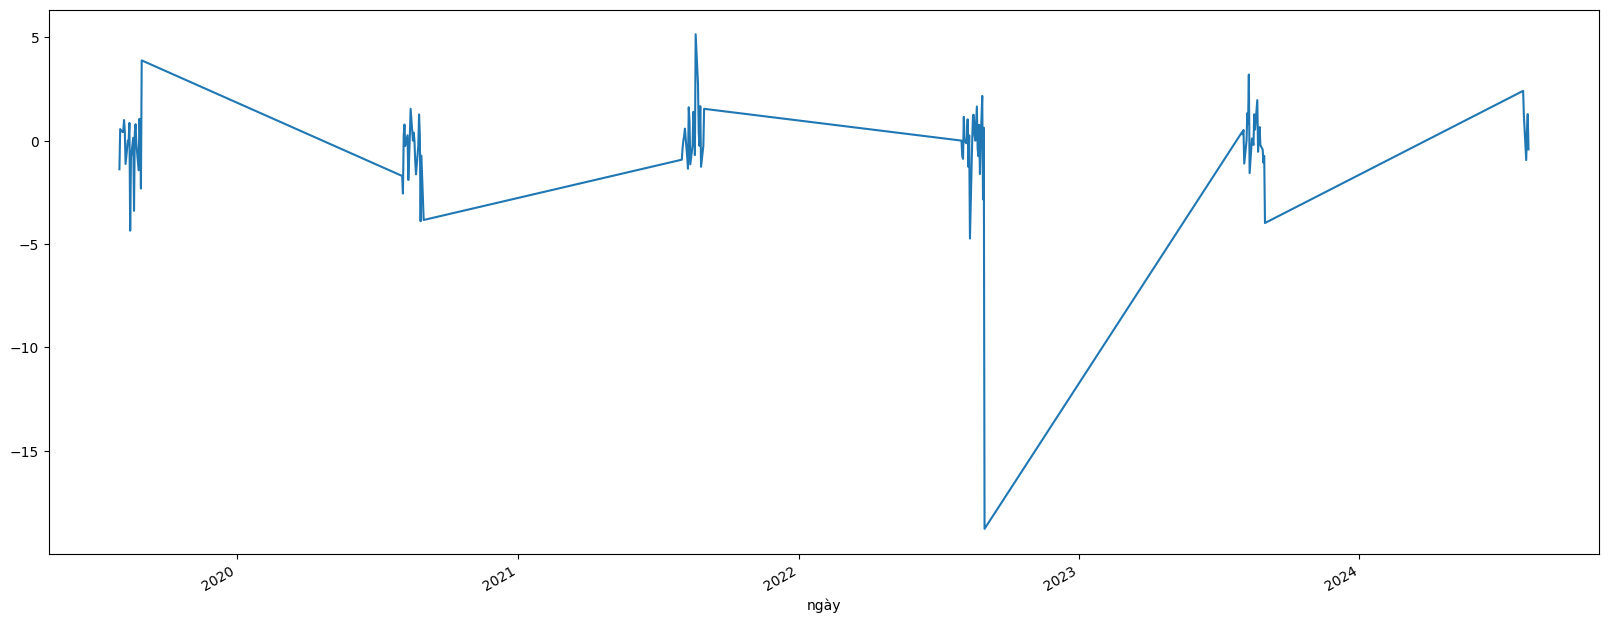

In [35]:
# stock return 
df['return'] = df.thay_đổi.sub(1).mul(100)
df['return'].plot(figsize=(20,8))

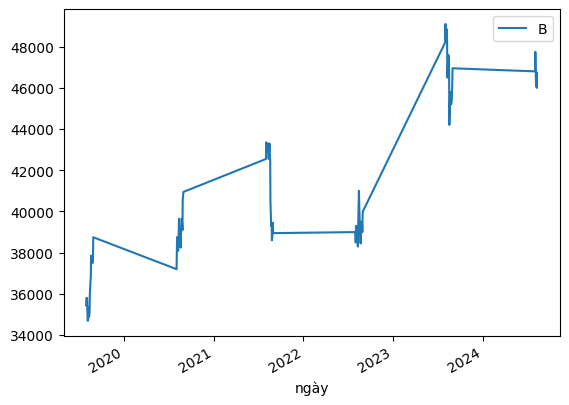

In [36]:
df.đóng_cửa.plot()
plt.legend('BID')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

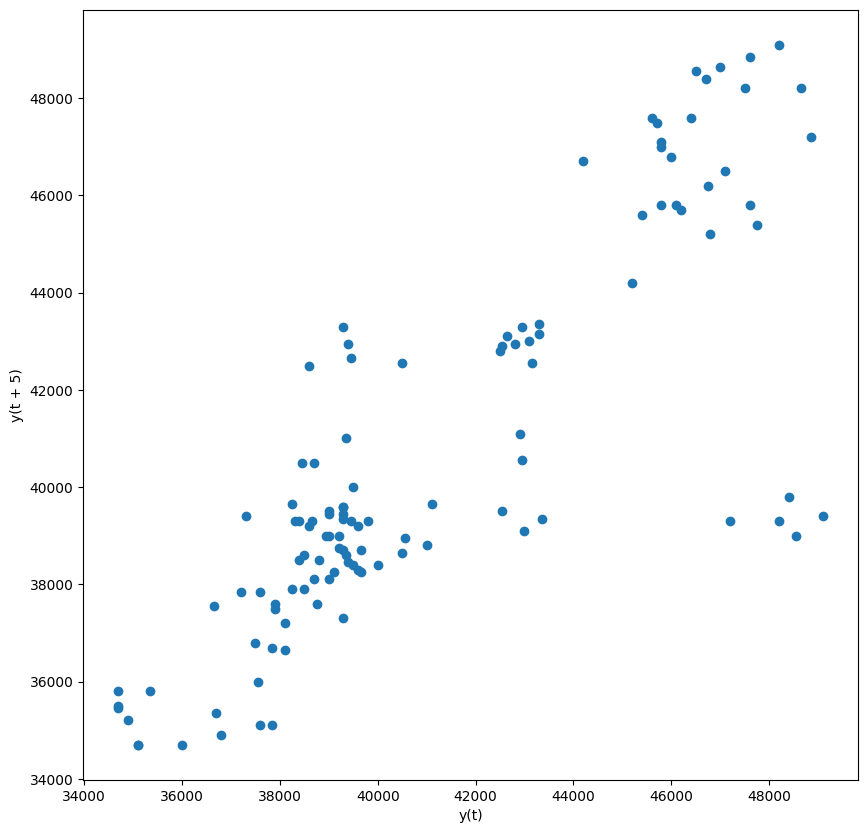

In [37]:
from pandas.plotting import lag_plot 
plt.figure(figsize=(10,10))
lag_plot(df['Mở_cửa'], lag=5)